<a href="https://colab.research.google.com/github/celsomax/mmdetection-egg/blob/gh-pages/EGG__MMDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMDetection Tutorial

Welcome to MMDetection! This is the official colab tutorial for using MMDetection. In this tutorial, you will learn
- Perform inference with a MMDet detector.
- Train a new detector with a new dataset.

Let's start!


## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 25kB/s 
     |████████████████████████████████| 6.6MB 63.8MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 256kB 12.9MB/s 
     |████████████████████████████████| 194kB 36.4MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.2.1-cp36-cp36m-linux_x86_64.whl size=20354331 sha256=f2da55b31033065763a7afd737fe125e12da077eb1c827fb5efdf79fb0f558d2
  Stored in directory: /root/.cache/pip/wheels/41/0b/39/0cec97174407144208eed51efda0169de0860c0b8460ed0855
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
rem

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.6.0
10.1
GCC 7.5


In [ ]:
!pip install jupyter-tensorboard

  Created wheel for jupyter-tensorboard: filename=jupyter_tensorboard-0.2.0-py2.py3-none-any.whl size=15258 sha256=7d3fbb41f1fe0e583f80c876191724e94b9c1fe399f305474ac6a8c57e6ab306
  Stored in directory: /root/.cache/pip/wheels/fb/64/e7/40c0949a4c8604b75cf901a7791c30f0308dac5afe0ecc4ce3
Successfully built jupyter-tensorboard


## Perform inference with a MMDet detector
MMDetection already provides high level APIs to do inference and training.

In [ ]:
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_32x4d_fpn_2x_coco/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth \
      -O checkpoints/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2020-11-29 18:55:11--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_32x4d_fpn_2x_coco/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242162900 (231M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth’

checkpoints/faster_ 100%[===================>] 230.94M  9.33MB/s    in 25s     

2020-11-29 18:55:38 (9.07 MB/s) - ‘checkpoints/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth’ saved [242162900/242162900]



In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_x101_32x4d_fpn_2x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_x101_32x4d_fpn_2x_coco_bbox_mAP-0.412_20200506_041400-64a12c0b.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

In [ ]:
# Use the detector to do inference
#img = 'demo/ferias2.jpg'
img = '/content/mmdetection/egg/train/IMG_20191119_155431_jpg.rf.003ae69ee13d4be720ffa2509ab2b28f.jpg'
result = inference_detector(model, img)

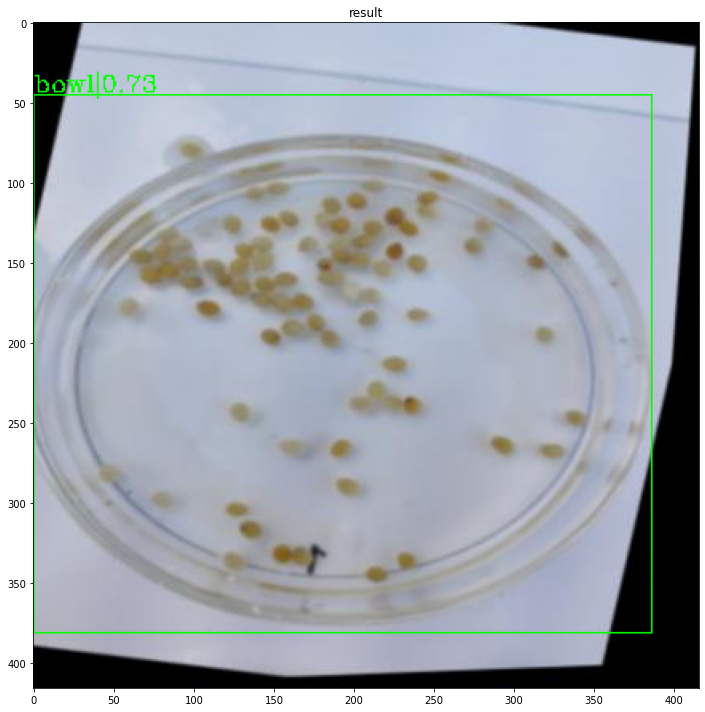

In [ ]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

## Train a detector on customized dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



In [ ]:
# !unzip /content/mmdetection/egg/egg.zip 
#!pip install tree
!tree /

!pwd


/bin/bash: tree: command not found
/content/mmdetection


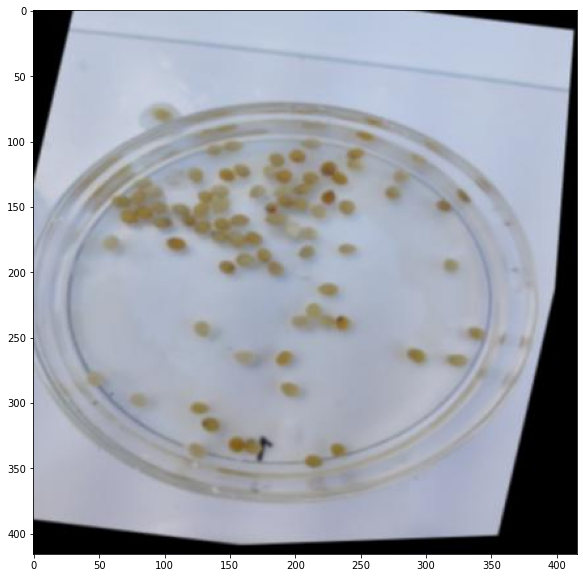

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('egg/train/IMG_20191119_155431_jpg.rf.003ae69ee13d4be720ffa2509ab2b28f.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the kitti annotation format into the middle format. In this tutorial we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a loot at the annotation txt file.



In [ ]:

!python /content/mmdetection/tools/train.py  /content/mmdetection/configs/grid_rcnn/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco.py --work-dir=/content/CELSO/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco

In [ ]:
! rm /content/*

In [73]:
!python /content/mmdetection/tools/test.py /content/mmdetection/configs/grid_rcnn/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco.py --show-dir=/content/CELSO/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco/result  --out=/content/CELSO/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco/result.pkl /content/CELSO/grid_rcnn_x101_64x4d_fpn_gn-head_2x_coco/latest.pth   --eval bbox 

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>] 19/19, 4.4 task/s, elapsed: 4s, ETA:     0s
writing results to /content/CELSO/faster_rcnn_x101_64x4d_fpn_2x_coco/result.pkl
Traceback (most recent call last):
  File "/content/mmdetection/tools/test.py", line 208, in <module>
    main()
  File "/content/mmdetection/tools/test.py", line 204, in main
    print(dataset.evaluate(outputs, **eval_kwargs))
  File "/content/mmdetection/mmdet/datasets/coco.py", line 394, in evaluate
    raise KeyError(f'metric {metric} is not supported')
KeyError: 'metric mAP is not supported'


Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset.

# Tensorboard

In [57]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [58]:
import tensorflow as tf
import datetime, os

Start TensorBoard within the notebook using [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html):

In [ ]:
%tensorboard --logdir /content/CELSO/

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [ ]:
#!python /content/mmdetection/tools/test.py /content/mmdetection/configs/faster_rcnn/faster_rcnn_x101_64x4d_fpn_2x_coco.py --show-dir=/content/CELSO/result  --out=/content/CELSO/result.pkl /content/CELSO/latest.pth   --eval bbox
!python /content/mmdetection/tools/analyze_logs.py plot_curve /content/CELSO/20201129_193105.log.json  --keys loss --out=/content/CELSO/losses.pdf


In [ ]:
!python /content/mmdetection/tools/analyze_logs.py plot_curve /content/CELSO/faster_rcnn_x101_64x4d_fpn_2x_coco/20201129_193105.log.json  --keys loss_cls --legend loss_cls --out=/content/CELSO/faster_rcnn_x101_64x4d_fpn_2x_coco/losses.jpg
